
學習資源：https://www.coursera.org/learn/convolutional-neural-networks/home/week/4

## Computer Vision Problems  
* Image Classification
* Object detection：將圖片中的所有欲偵測物體都圈起來，以辨識位置與距離。
* Neural Style Transfer：輸入圖片與風格圖像，將圖片轉換成特定風格。

挑戰：
輸入的圖片可能非常大，以64*64為例，輸入特徵x的維度是64*64*3(RGB)=12288；1M像素則是1000*1000*3=3000000，意指神經元中可能會有3百萬個參數，而這麼多的參數很難過得足夠的數據以避免神經網路過擬和，且3百萬個參數對計算量與內存的需求非常高。  

而卷積神經網路可以幫助計算擁有高像素的圖片。


卷積運算是組成卷積神經網路的基礎。  

### Edge Detection Example  
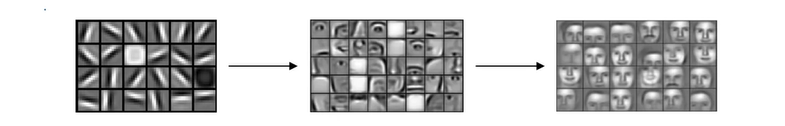  


假設先檢測圖中的垂直、水平邊緣。  
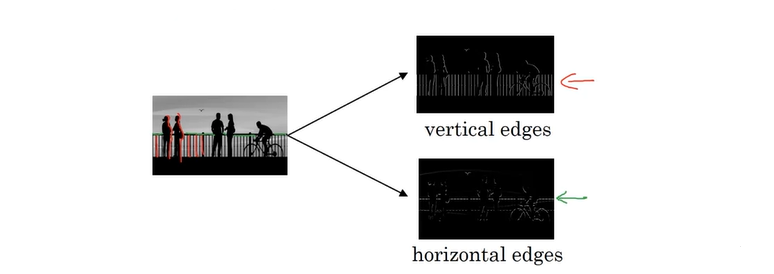

檢測方法：  
以下為6*6*1的矩陣，因為為灰度圖像，沒有分開的RGB通道，而為了檢測特定方向的邊緣，需建立一個3*3的矩陣(在pooling過程中用卷積的專業術語而言，這被稱為過濾器filter；核kernel)，卷積運算用 *表示(但在python中 *為元素乘法，因此用其他方式表示卷積運算)，輸出為一個4 *4的矩陣。  
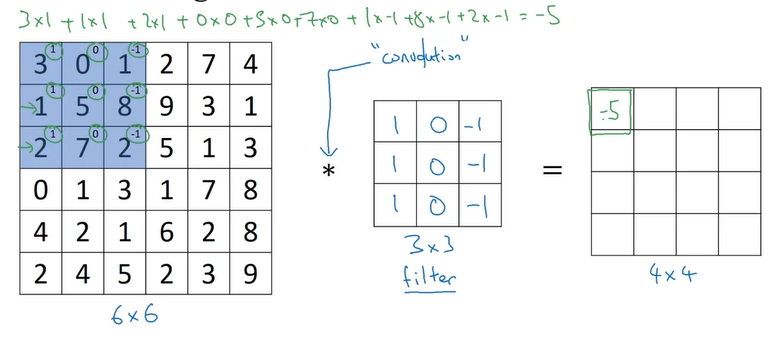
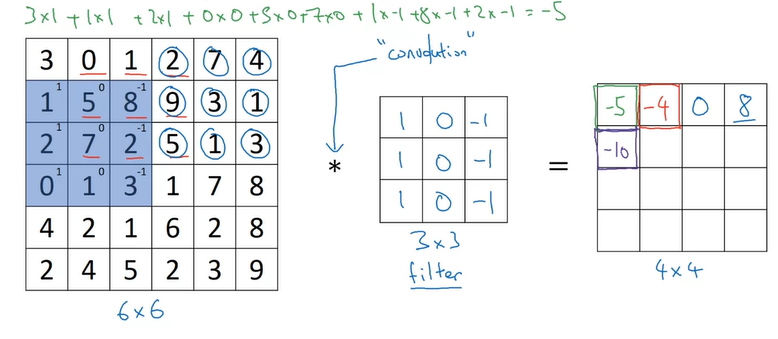  


<font color="red">※實現卷積運算的函式：</font>   
<font color="red">python:conv_forward</font>  
<font color="red">Tensorflow:tf.nn.conv2d</font>  
<font color="red">keras:Conv2D</font>

**範例**  
3*3矩陣中1為亮側，0忽略不重要的地方，-1為暗側。  
最後可得出邊緣在中間。
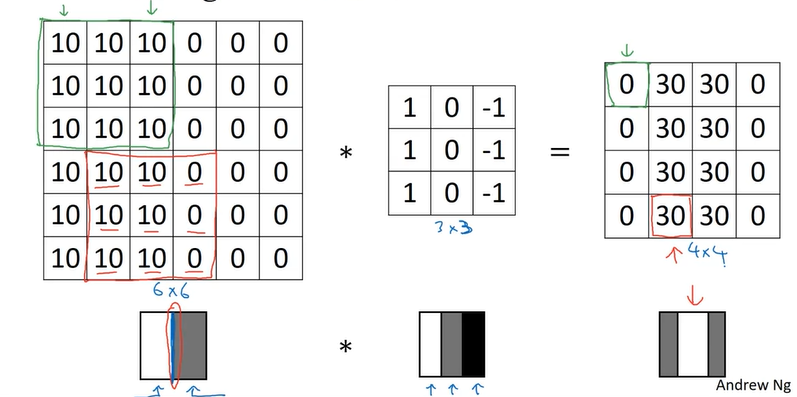  


由亮變暗：  
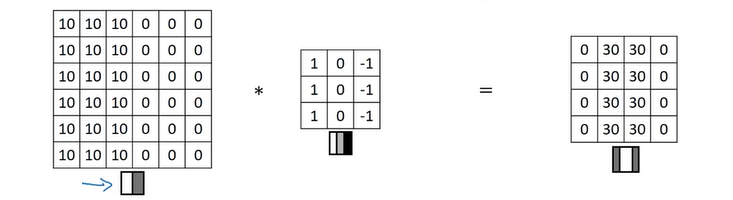

由暗變亮：  
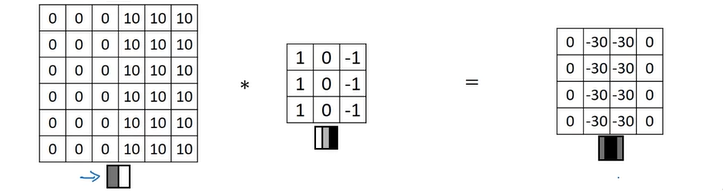


同理3*3的矩陣還可以檢測水平邊界。  
垂直邊界是左邊比較亮右邊比較暗，水平邊界則為上面比較亮下面比較暗。
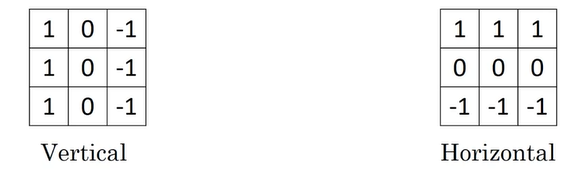

#### positive edges & negative edges  
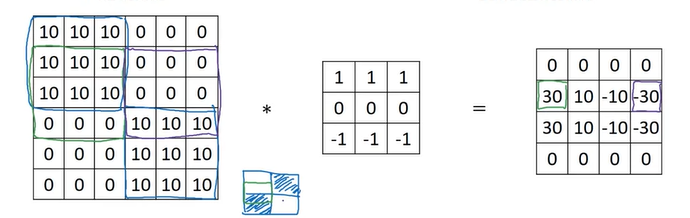


$\left[ \begin{array}{ccc:ccc}
    10 & 10 & 10 & 0 & 0 & 0 \\ \hdashline
    10 & 10 & 10 & 0 & 0 & 0 \\
    10 & 10 & 10 & 0 & 0 & 0 \\
    0 & 0 & 0 & 10 & 10 & 10 \\ \hdashline
    0 & 0 & 0 & 10 & 10 & 10 \\
    0 & 0 & 0 & 10 & 10 & 10
\end{array} \right]$
中的  

$\left[ \begin{array}{ccc:ccc}
    10 & 10 & 10 \\
    10 & 10 & 10 \\
    0 & 0 & 0  
\end{array} \right]*\left[ \begin{array}{ccc:ccc}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    -1 & -1 & -1  
\end{array} \right]=30$，表示在圖上的上半部較亮，因此得到正值。  
$\left[ \begin{array}{ccc:ccc}
    0 & 0 & 0 \\
    0 & 0 & 0 \\
    10 & 10 & 10  
\end{array} \right]*\left[ \begin{array}{ccc:ccc}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    -1 & -1 & -1  
\end{array} \right]=-30$，表示在圖上的下半部較亮，因此得到負值。  
10與-10則代表圖中介於明暗轉換的中間處。


#### 其他filter  
有許多能選擇的過濾器。  
除了剛剛範例中示範的過濾器之外。
$\left[ \begin{array}{ccc}
    1 & 0 & -1 \\
    1 & 0 & -1 \\
    1 & 0 & -1  
\end{array} \right]$  

**sobel filter**
$\left[ \begin{array}{ccc}
    1 & 0 & -1 \\
    2 & 0 & -2 \\
    1 & 0 & -1  
\end{array} \right]$
給予中間行更大的權重，而使結果更加穩定。  

**Scharr filter**
$\left[ \begin{array}{ccc}
    3 & 0 & -3 \\
    10 & 0 & -10 \\
    3 & 0 & -3  
\end{array} \right]$ 


除了特別為了檢測而挑選出這9個矩陣元素$\left[ \begin{array}{ccc}
    w_1 & w_2 & w_3 \\
    w_4 & w_5 & w_6 \\
    w_7 & w_8 & w_9  
\end{array} \right]$   
同理，也可以將這些元素當作9個參數，透過反向傳播去學習他們的數值，得到的權重進行卷積後的結果往往比工程師自行挑選的filter得出的偵測結果更加好。

### Padding(填充)  
當有$n$x$n$的圖片要使用一個$f$x$f$的過濾器時，輸出的維度會等於$(n-f+1)$x$(n-f+1)$  

缺點：
1. 每次進行卷積時圖像都會縮小。  
2. 圖片中央的像素最多可能進行9次卷積運算(使用3*3 fliter)，但圖片邊緣的像素只會進行一次卷積運算，而這會使運算過程中丟失很多靠近邊界的訊息。

為了同步改善上述兩種缺點，在卷積運算前可以先用一個額外的邊緣填充圖片(向邊緣拓展一個向素，填充的值為0)。  
以6*6的輸入圖片為例，填充後圖片變成8 *8，在卷積後圖片的大小為$(8-3+1)$x$(8-3+1)=6$x$6$，大小維持一致。  
填充的值可自由選擇，並不限於只能填充一個像素。
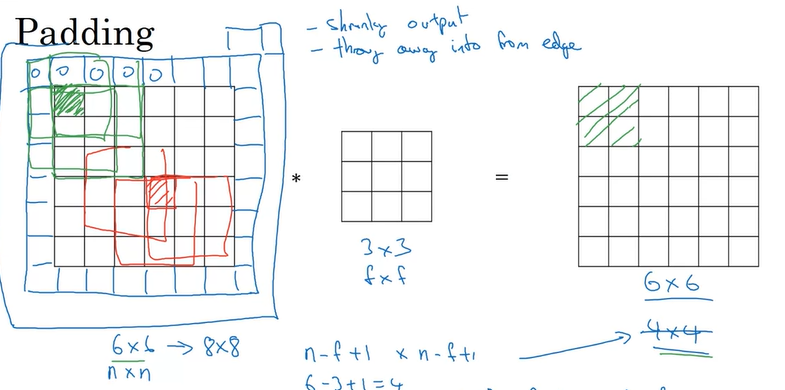

"Valid":沒有填充，$n$x$n*f$x$f\rightarrow(n-f+1)$x$(n-f+1)$  
"Same":填充後使輸出大小等於輸入大小，$n$x$n*f$x$f\rightarrow(n+2p-f+1)$x$(n+2p-f+1)=n$x$n\rightarrow(n+2p-f+1)=n\rightarrow p=\frac{f-1}{2}$  

※幾乎只會看到奇數的(f)構成fliter。

### Strided(步輻) Convolutions  
下圖中令stride=2(s=2)。  
公式：$n$x$n*f$x$f\rightarrow \lfloor\frac{n+2p-f}{s}+1\rfloor$x$\lfloor\frac{n+2p-f}{s}+1\rfloor$  
若計算的結果為分數，則會對分數求下限(floor(x))，因為若無法形成一個完整的藍色方框去與fliter卷積運算，則就略過那塊的計算。
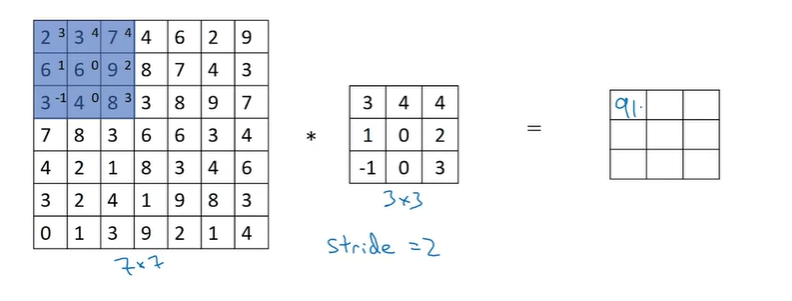
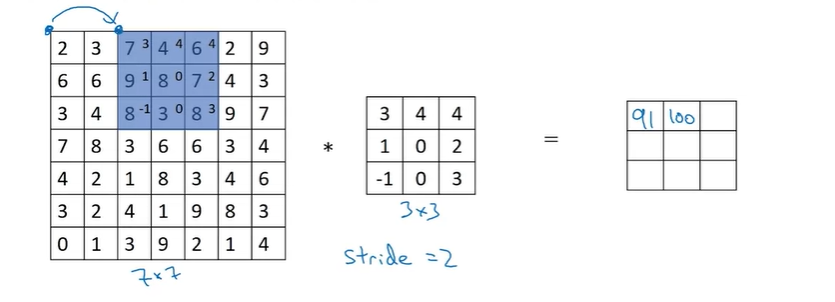
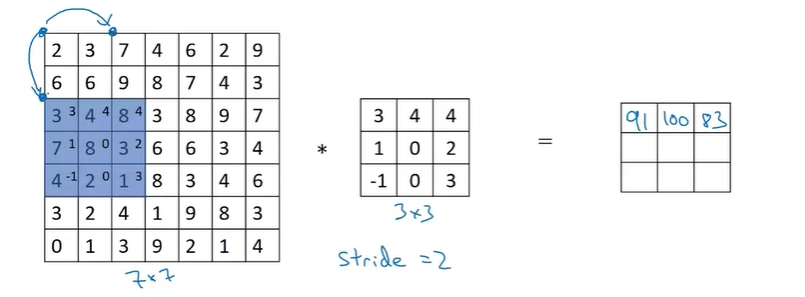

## Convolutions Over Volume  
對三維圖像進行卷積算法。  
ex.RGB影像，可視為3張6x6圖片疊加，此時fliter也要改為三維的。  
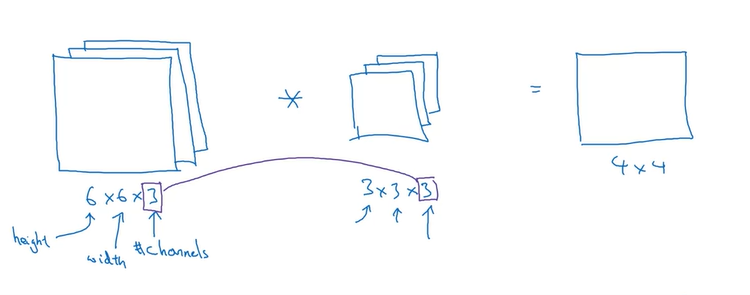  

輸入圖片的第一個6為圖片的高度，第二個6為圖片的寬度，第三個3為通道數量(channel)，fliter的通道數需跟輸入圖片的通道數一樣，最後輸出的為4x4x1的圖片。  

依照同樣的方法得到卷積運算結果，若想單獨知道紅色層的計算結果，可將3x3x3的fliter中後兩層的參數都設為0，形成$\left[ \begin{array}{ccc}
    0 & 0 & 0 \\
    0 & 0 &  \\
    0 & 0 & 0  
\end{array} \right]$，只留下第一層的參數，假設為$\left[ \begin{array}{ccc}
    1 & 0 & -1 \\
    1 & 0 & -1 \\
    1 & 0 & -1  
\end{array} \right]$，如此去進行卷積運算後得出的結果就會只有第一層。 

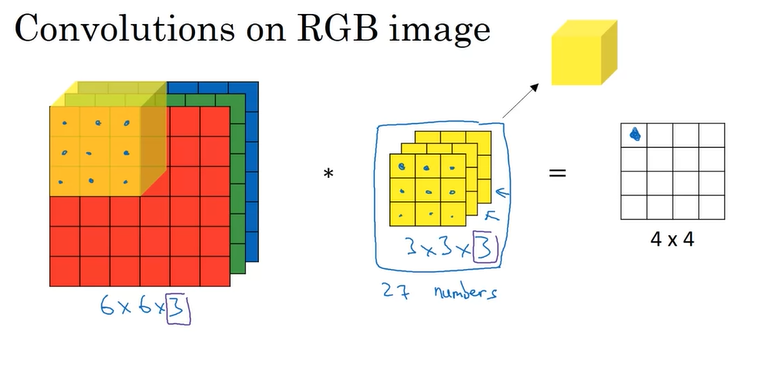

### Multiple fliters  
ex.同時計算垂直、水平，將通過不同fliter進行卷積運算後的輸出疊加在一起，得到4x4x2，2為fliter的數量。  
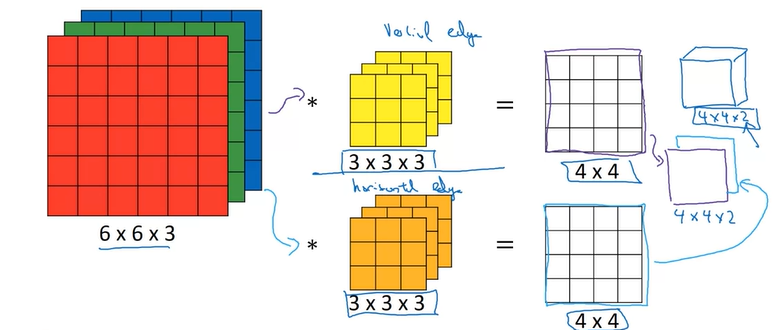

## One Layer of a Convolutional Network  
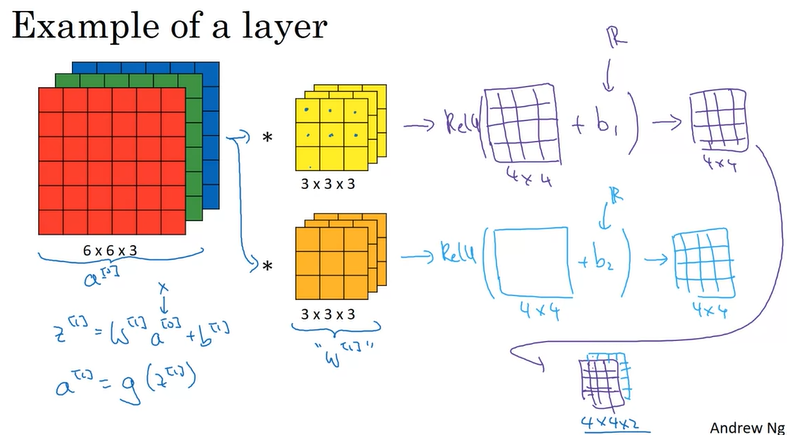
將上圖中的4x4輸出變成單層卷積神經網路，這個過程中需要將輸出加上bias(16個元素加上相同的偏差)，接著加入非線性轉換(ex.ReLU)，這些步驟處理完後會得到一個4x4的矩陣輸出，可將由不同fliter計算後的結果組合，得到4x4x2的輸出，即成為卷積神經網路中的一層。  
此層中的fliter作用和$w$類似，而計算後還未經ReLU更改的4x4輸出和$w^{[1]}a^{[0]}$相似，4x4輸出+$b_1$可視為$z$，最終經非線性方程處理後合併的輸出4x4x2可視為$a^{[1]}$，成為下一層的激活函數。  
最初輸入的6x6x3圖片為$a^{[0]}$。  
兩個fliter即代表兩個特徵。


**Example**  
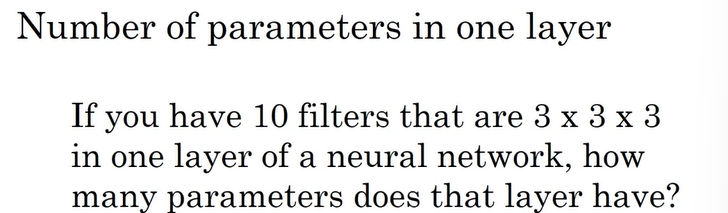  
3x3x3+1(bias)=28, 28x10=280  
此外注意不論輸入的圖片有多大，得到的參數都是280個。

### Summary of notation  
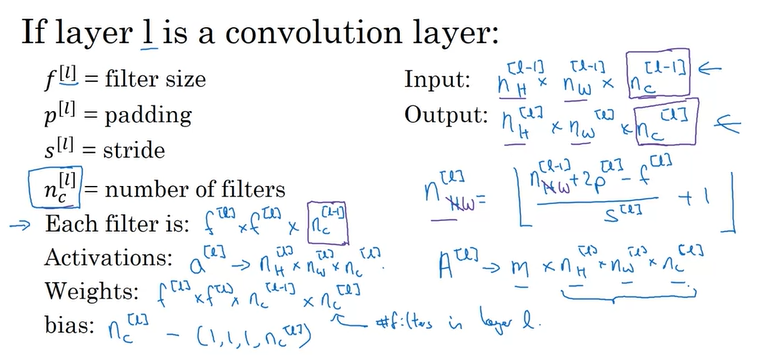

### Simple Convolutional Network Example  
設有一張39x39x3，$n_H^{[0]}=n_W^{[0]}=39, n_c^{[0]}=3$的圖片要進行分類，$f^{[1]}=3(3$x$3的$fliter$), s^{[1]}=1, p^{[1]}=0$, 且有10個fliter(feature)。  

下一層中為37x37x10$\rightarrow 37=\frac{n+2p-f}{s}+1$，$10$為上層fliter的數量。  

依同樣的計算方式一直算到最後一層後，得到7x7x40，共1960個單元，將他們扁平化成一個向量，再輸出到一個邏輯回歸或softmax單元中，以分類圖片(二元或多元)。
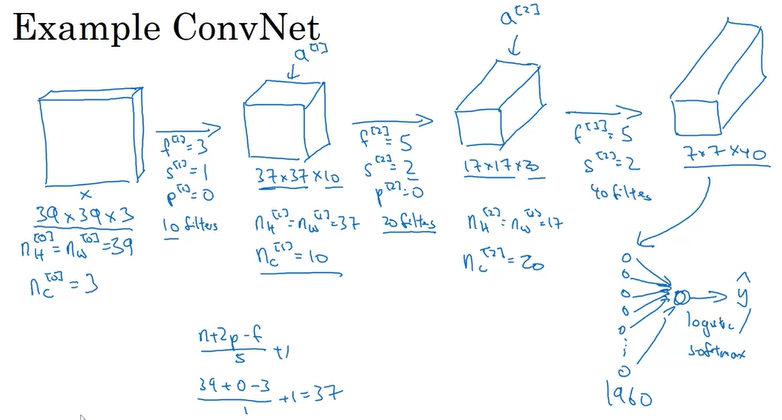

※當進入更深的神經網路層中，channel數通常會增加。

#### Type of layer in a convolutional network  
* 卷積層(Convolution;Conv層)
* 池化層(Pooling;POOL)
* 全連接層(Fully connected;FC)

※神經網路只使用卷積層是可行的，但通常也會加入一些池化層跟全連接層。

## Pooling Layers  
池化層用來減小大小，以加快計算的速度，同時也可以產生一些特徵使偵測更加堅固。  


### Pooling Type:Max pooling  

假設有一個4x4輸入，應用於Max pooling，後會得到2x2的輸出。  
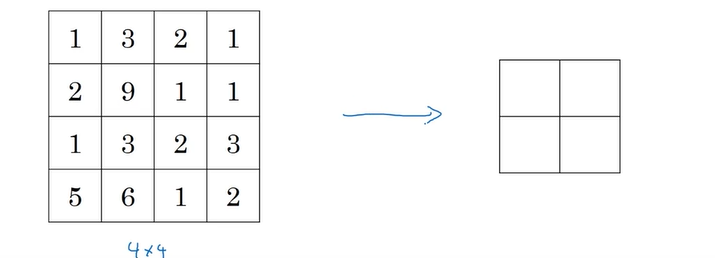  

詳細方法是：將4x4輸入分解成不同的區域，對應到2x2輸出上，需要做的只是將每個區域中的最大值輸出到對應位置。  
可想像成一個2x2的fliter，步幅(s)=2。
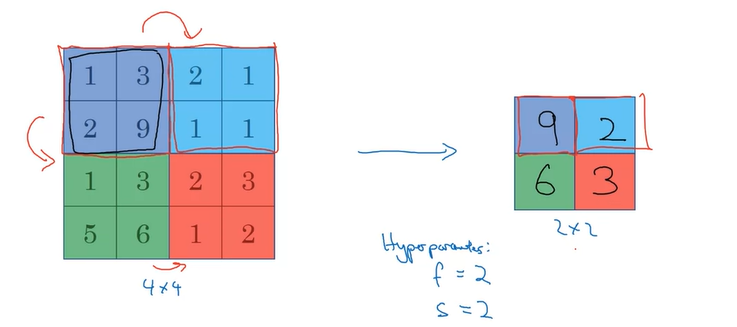  

<font color="red">最大化運算指的是，如果這個特徵在fliter中任何地方被偵測到就保留最高的數值，若沒有被偵測到，此時即便選擇了該區域的最大值，但他跟其他區比起來還是很小。</font>

#### 特性  
由上方的圖可以看到他有兩個超參數(hyperparameter)但沒有參數要學習，一旦固定了f跟s，就保持這個固定的運算，不用透過梯度下降改變任何東西。  


#### 其他例子  
這個例子中使用了不同的超參數。
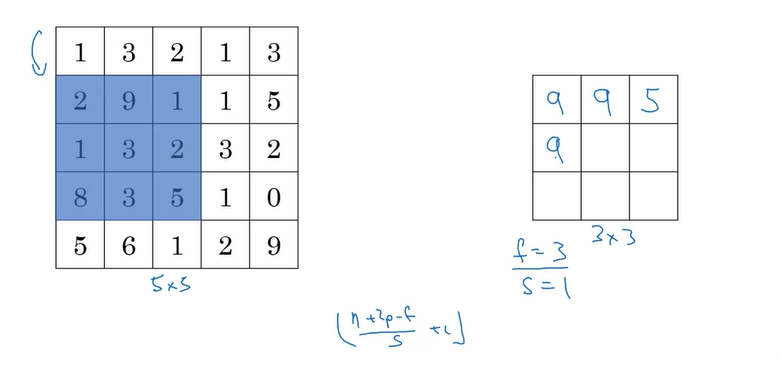  

同理，也可以增加輸入的channel數量。  
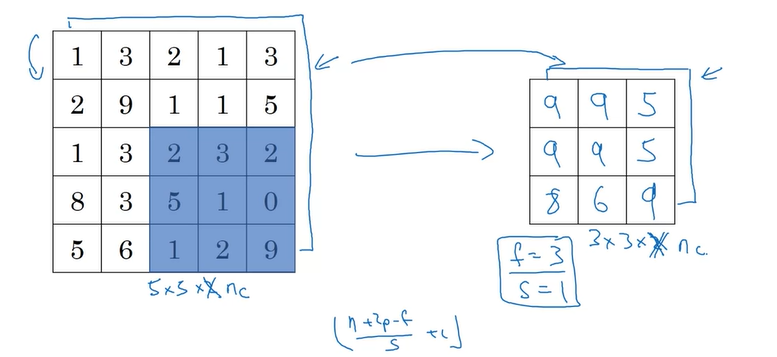

### Pooling Type:Average pooling  
取每個區域的平均值。  
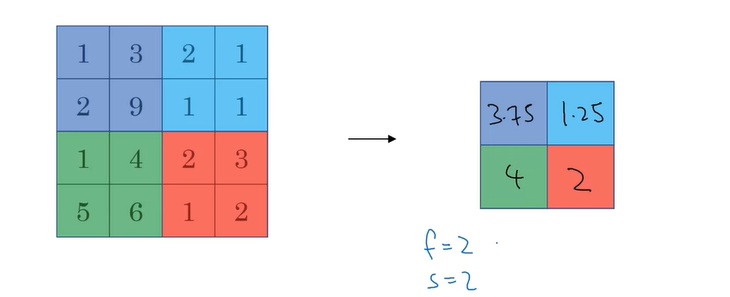
<font color="red">現今在使用上Max pooling使用次數遠大於Average pooling，但在很深的神經網路中，可能會使用Average pooling來壓縮。  
ex.7x7x1000$\rightarrow$1x1x1000
</font>

### Summary  
除了使用f、s這兩個超參數之外，也可以使用p(padding)，但情況非常罕見，因為在使用Max pooling時通常不會使用到padding(p=0)。
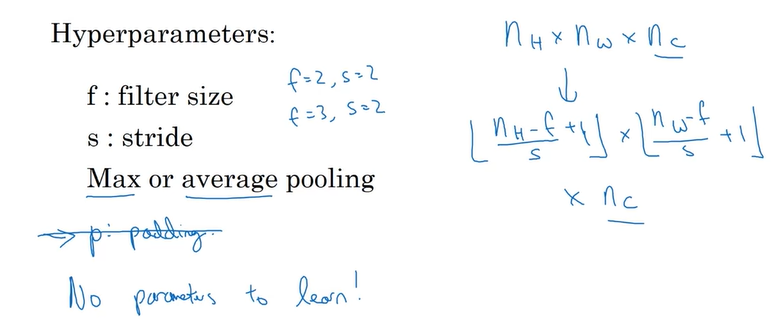

## CNN Example(參考LeNet-5)  
數字辨識，輸入32x32x3的RGB圖片。  
CONV層跟POOL層有些人會認為是一層，有些人會認為是兩層，這邊採用一層的說法。  
CONV1使用6個fliter，CONV2使用16個fliter，一系列處理後形成5x5x16=400，將400展開成400x1的向量，接著用400個單元做輸入創建有120個單元的下一層，為第一個全連接層(FC3)(因為這400個輸入單元和120個輸出單元密集的相連)。  
全連接層為一個標準的神經網路，權重矩陣大小$W^{[1]}=(120,400)$，偏差(bias)也為大小120的向量，因為有120個輸出。  
再加上一層全連接層(FC4)使輸出變的更小，得到大小為84的向量，這84個實數可以用於softmax，以數字辨識為例，softmax層共有10個輸出。

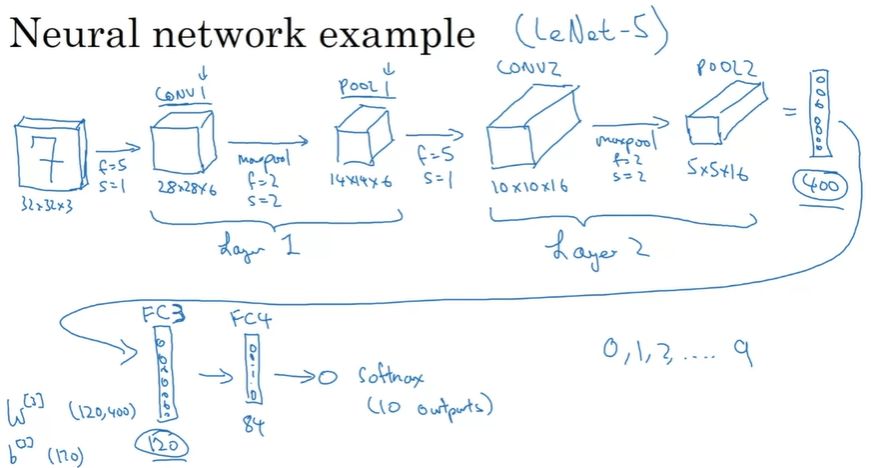


<font color="red">※當深入神經網路時通常高度跟寬度都會減小，channel的數量會增加。</font>  
另種常見的神經網路模型是一層或多層的卷積層接一個池化層，接著再接一層或多層的卷積層後接一個池化層，最後再疊加幾層全連接層，且在輸出前可能會再經過softmax層。

* 最大池化層沒有任何參數。  
* 卷積層傾向於擁有較少的參數，多數參數在神經網路的全連接層上。  
* 隨著神經網路的深入，激活輸入大小逐漸變小，但如果減少的太快通常不利於神經網路的性能。  
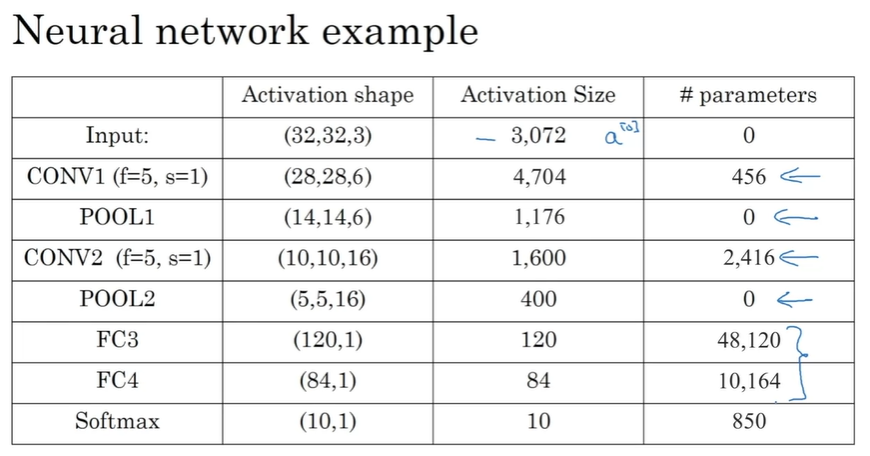

## Why Convolutions?  
使用卷積的好處、如何將卷積與神經網路合在一起?  

卷積層相較只使用完全連接的神經層相比的優勢：
* 參數共享(Parameter sharing)  
  在特徵檢測器中，例垂直邊緣檢測對於圖像的一部份有用，那對於另一部份也可能是有用的。ex.向右移的藍色方框，用相同的9個參數計算出16個輸出結果
  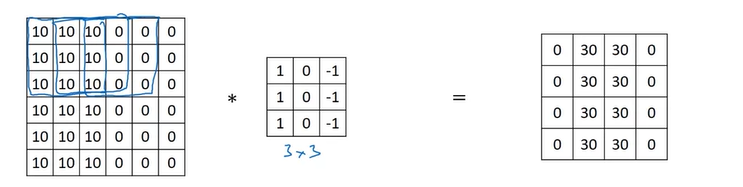
* 連接的稀疏性(Sparsity of connections)
  只有相對少的參數方法是建立稀疏的聯繫。ex.左上方的0只和輸入中最左上方3x3的9個特徵相連，其他的部分完全沒有關聯，即為稀疏式聯繫。
  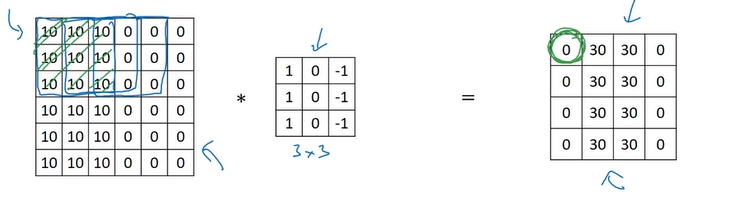


使用帶有標籤的訓練數據集去訓練卷積神經網路。

可使用梯度下降或梯度下降動量、RSMProp、Adam等，以優化所有神經網路參數。  
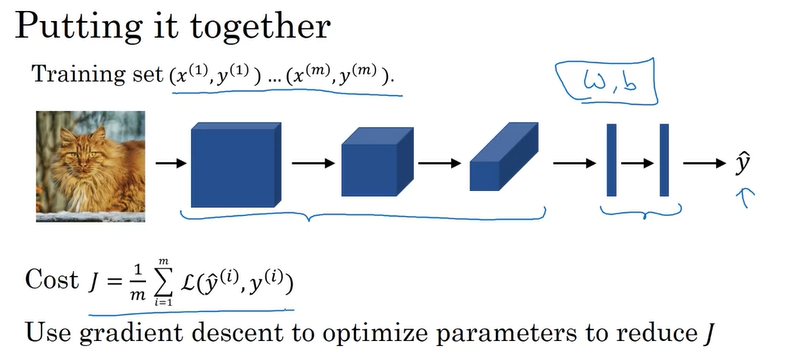

## case studies  
* 在一項計算機視覺任務上運行良好的神經網路架構通常也能很好的處理其他任務。  

* 經典網路：
  * LeNet-5
  * AlexNet
  * VGG  

* ResNet訓練了一個非常深的152層神經網路
* Inception


### 經典網路-LeNet-5  
在灰度圖片上辨識數字。  
最初使用6個fliter，接著用avg pool降維，使長寬變為原先的一半，再使用16個fliter。  
在這種神經網路研發時，人們不常使用padding，因此圖片的長與寬會逐漸降低。  
接著接上一層avg pool，其中的400個節點都連接上下層的全連接層中的120個神經元，接著這120個神經元都接上再下一個全連接層中的84個神經元，最終使用這84個特徵輸出最終結果($\hat{y}$包括10個預測值1-10)。  
現今，輸出層用softmax，在當時使用的是其他分類器。

這是個小型模型，大概只有60000個參數。

文獻中使用sigmoid、tanh而不使用ReLU。  
原始的LeNet-5在池化後會有非線性處理(sigmoid)。  
當時的電腦運算非常慢，因此當時在運算時，不同的fliter會處理輸入的不同channel，而現今則不用這種較為複雜的方法。

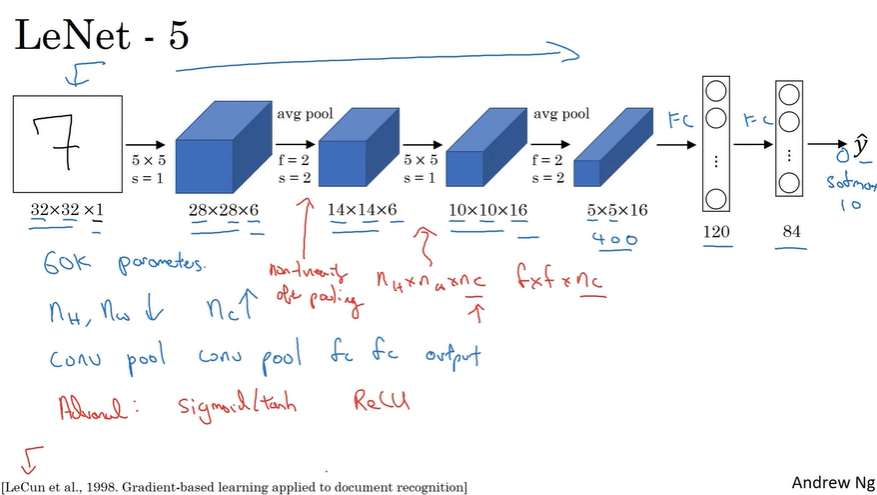



### 經典網路-AlexNet  
AlexNet以227x227x3的輸入開始，第一層的步長為4，因為步長較大，因此維度下降的很快。
用了4次same padding，且AlexNet具有許多超參數。

這個神經網路格式很像LeNet-5，但更大，AlexNet大概有6千萬參數。  
AlexNet相較LeNet-5的優勢是他使用了ReLU激活函數。  
當時因為GPU較慢，因此這個文章有在兩個GPU上訓練的複雜方法，大致概念是神經網路中的很多層被分割到兩塊不同的GPU上，GPU之間可以互相通訊。  
原始的AlexNet結構還有局部響應歸一層(LRN)，基本概念是觀察以下其中一塊體積塊，假設為13x13x256，看其中一個位置的高和寬，再看同個位置但跨越所有channel的地方然歸一化，局部響應歸一操作是針對處理這個13x13圖片中的每個位置。  

這篇文章使研究者開始認真對待深度學習。  

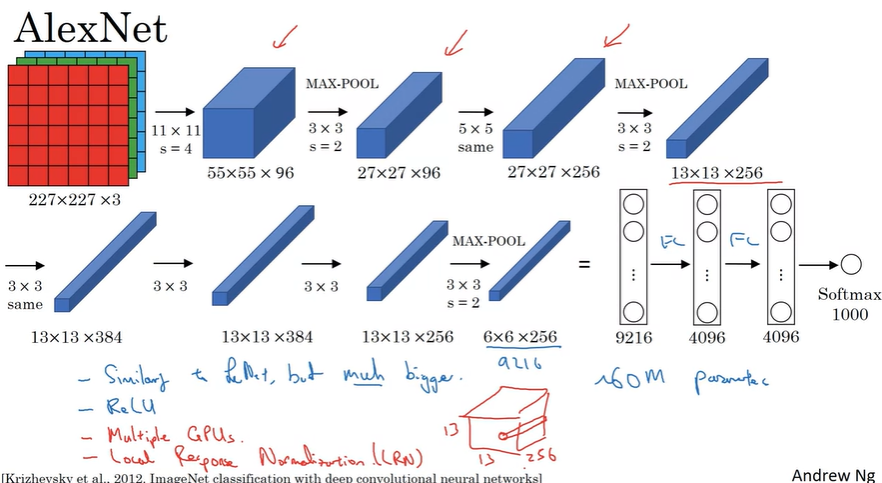

### 經典網路-VGG(VGG-16)  
VGG-16結構更加簡單，因為沒有大量的超參數，他的每個超參數值都是相同的，因此更能關注在卷積層。  
16的意思是指該網路有16層帶權重的層。
優點：真正簡化了神經網路的結構。  

前兩層(用CONV64 x2表示)是卷積層都使用64個fliter與same padding，s=1，因此得到224x224x64；最後進入兩個4096個神經元的全連接層，然後由softmax函數輸出1000個結果。  
這個神經網路的結構很有規律，是採CONV、POOL、CONV、POOL、FC的順序，且卷積層中fliter的數量64→128→256→512。

缺點是以訓練參數的數量來看是非常大的網路，還有VGG-19，為更大的版本，但兩者性能差不多。

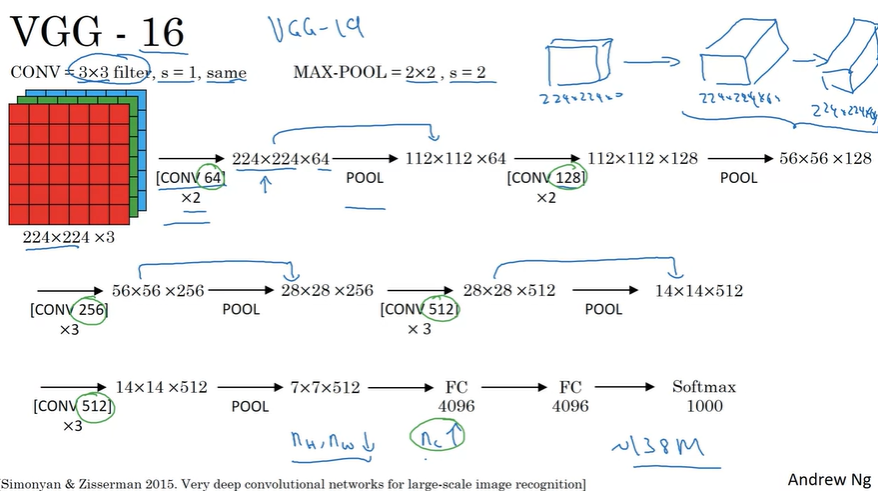


## ResNet  
太深的神經網路訓練起來很困難，因為會有梯度消失的問題，而跳躍連接(skip connection)，可讓神經元從一層中激活並突然傳遞到下層或更深的神經網路層中。  
利用跳躍連接就可以訓練很深很深的殘差網路(ResNet)。  

殘差網路是使用了殘差結構(Residual block)的網路，以下為例子。  
$a^{[l]}$表第l層中的激活函數，使用$a^{[l]}$經過線性運算後得到$z^{[l+1]}$，之後在通過非線性ReLU得到$a^{[l+1]}=g(z^{[l+1]})$，下圖中從$a^{[l+1]}$流向$a^{[l+2]}$的訊息，所要經過的所有步驟稱作這層的主路徑(Main pain)。  

而在殘差網路中，將$a^{[l]}$複製，移到神經網路很靠後的位置(紫色線路稱為快捷路徑(short cut;skip connection)，加在ReLU之前)，無須經過主路徑將$a^{[l]}$帶入更深層的神經網路中。  
最後一層的$a^{[l+2]}=g(z^{[l+2]})$改成$a^{[l+2]}=(z^{[l+2]}+a^{[l]})$，成為一個殘差塊。  
通過大量的殘差塊堆疊起來以形成一個深層網路。  
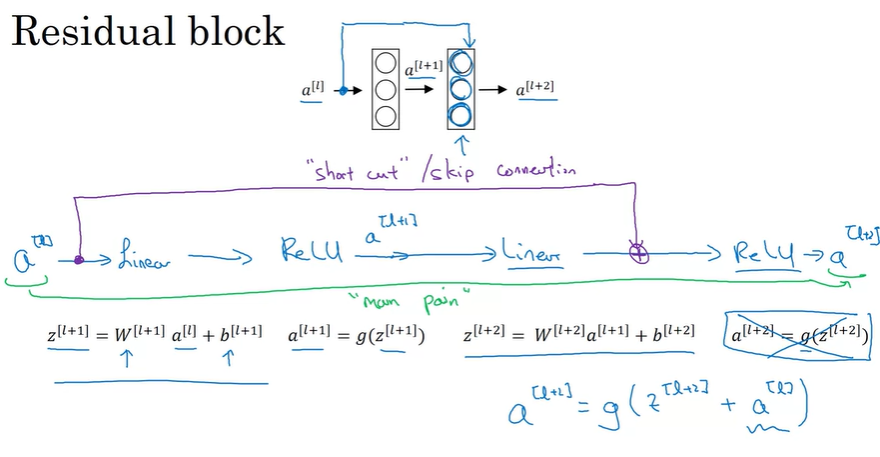



### 形成ResNet  
普通網路(plain network)：
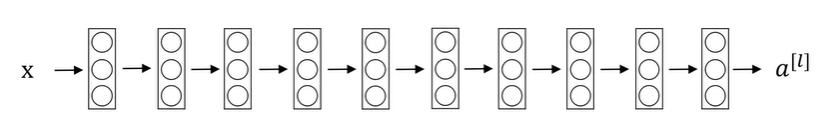

將其變為由5個殘差塊堆積在一起的網路，以形成殘差網路。  
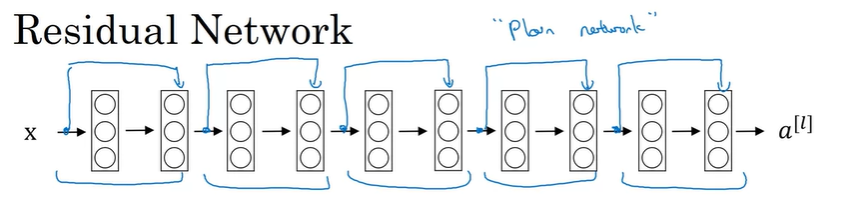

當步使用殘差網路時，若增加層數，訓練誤差在下降一段時間後會再度上升，但在理論上，若身經網路更深，那他的性能應該更好。  
而使用ResNet，即使層數增加，訓練誤差也會持續下降。  
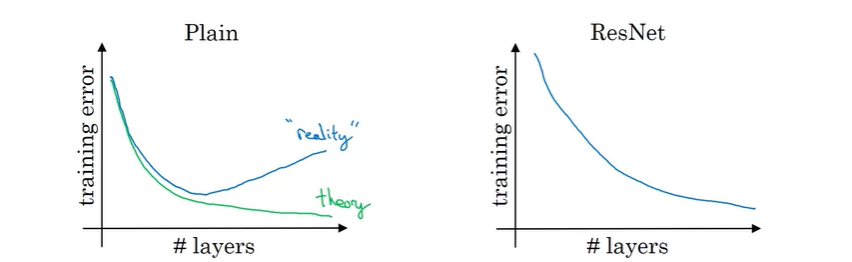


### Why ResNets Work?  
殘差塊比較容易學習恆等函數。  
當神經網路變的用來越多層後難以訓練的原因是因為參數變多，如此會很難選擇適合的參數，即使是恆等函數也一樣。

而殘差網路有用的原因在於這些額外層學習起衡等函數非常簡單。  
此外下圖中兩個紅點處的維度一樣($a^{[l]}、a^{[l+2]}$)，因為相同的卷積會保留維度，接著計算這兩個相同維度矢量的和$g(z^{[l+2]}+a^{[l]})$；若輸入與輸出有不同的維度，ex.$a^{[l]}$是128維，$a^{[l+2]}$是256維，此時需要增加一個額外的矩陣$W_s$為256x128大小的矩陣，乘以$a^{[l]}$後會使$a^{[l]}$變成256維。
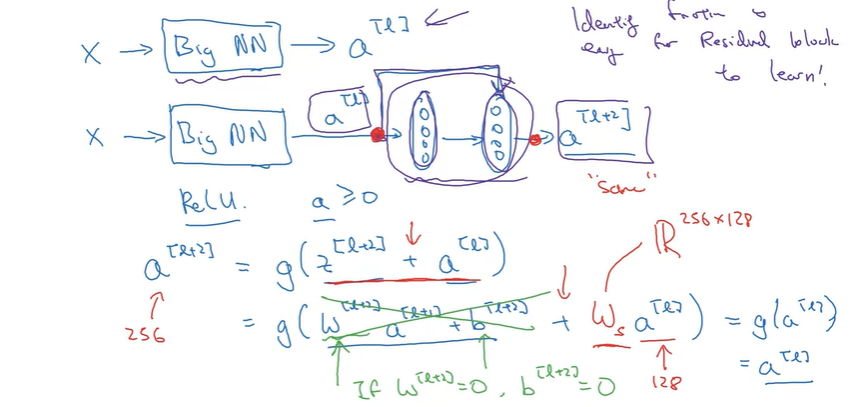


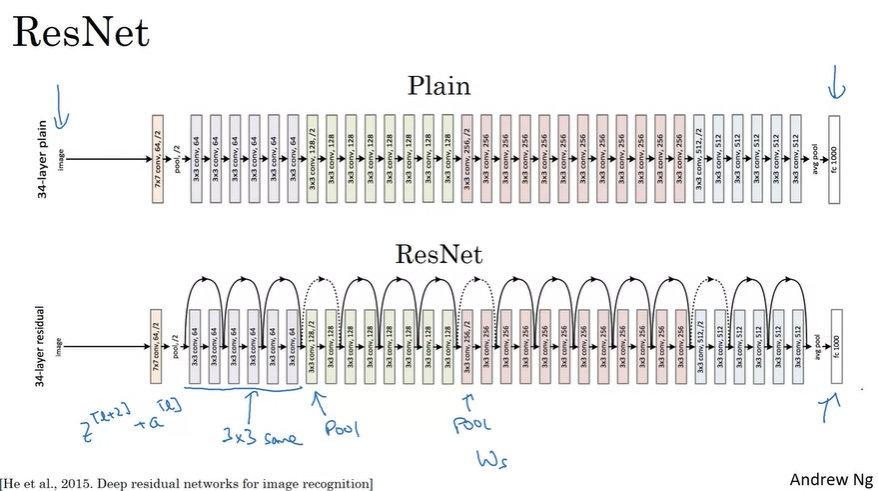

## Networks in Networks and 1x1 Convolutions
使用1x1的fliter縮小channel數量，達到節省網路中的計算成本。  
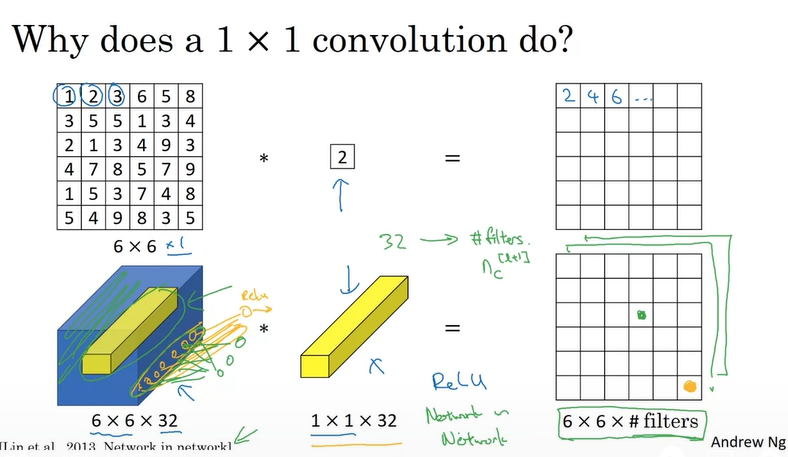  

ex.
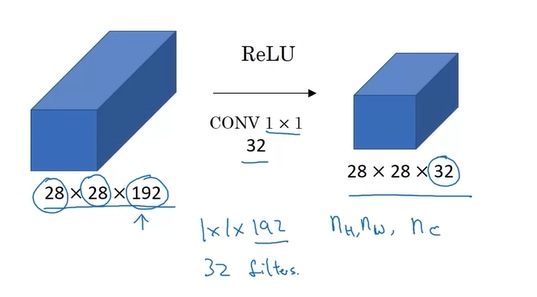
